## Intro 

You work at a small food service supply wholesaler that principally services the hotel/restaurant and retail channels. Currently, your company is working on designing a customer loyalty program but your CEO is unsure of the best way to proceed - the current thinking is a loyalty program that incentivizes customers to purchase across multiple offering categories (e.g., if a customer purchases from the grocery, frozen, and deli categories, they receive a discount).

Your CEO would like you to examine annual spending by the company’s current customers to understand if such a program would be attractive to the largest subgroup of customers.


Recomendations:

    - In order to gain customer loyalty, establish a customer loyalty program for customers who spend the most and who buy from across categories in order to retain and increase the highest volume of sales. In this case, customers from Clusters 0 and 2.  
    - In addition, the discount could tentatively be offered to large milk buyers from channel 1 with the intent to increase their buying from other categories as well.  
    - Given the limited information, it is not clear what type of discount should be offered. But this will depend on an analysis of the profit margin. It is recommended that this analysis is run before launching any discounts. 
    - The results of the implementation of these recommendations need to be tracked in order to evaluate their performance. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('wholesale_data.csv')
data.head()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,6048141,2017,12669,9656,7561,214,2674,1338
1,2,9336325,2017,7057,9810,9568,1762,3293,1776
2,2,6272942,2017,6353,8808,7684,2405,3516,7844
3,1,7856217,2017,13265,1196,4221,6404,507,1788
4,2,6179511,2017,22615,5410,7198,3915,1777,5185


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 9 columns):
Channel             801 non-null int64
Customer            801 non-null int64
Year                801 non-null object
Fresh               799 non-null object
Milk                798 non-null object
Grocery             798 non-null object
Frozen              798 non-null object
Detergents_Paper    799 non-null object
Delicassen          797 non-null object
dtypes: int64(2), object(7)
memory usage: 56.4+ KB


In [4]:
# Convert unrecorded to na
data.replace('unrecorded', np.nan, inplace=True)
data.replace('08/01/2016', 2016, inplace=True) 

In [5]:
# Convert to numeric 
for col in data.columns:
    data[col] = pd.to_numeric(data[col])


In [6]:
# Drop nas
data.dropna(inplace=True)

In [7]:
data.Year.unique()

array([2017, 2016])

In [8]:
data.Year.value_counts()

2017    417
2016    353
Name: Year, dtype: int64

Text(0.5,0,'Channel')

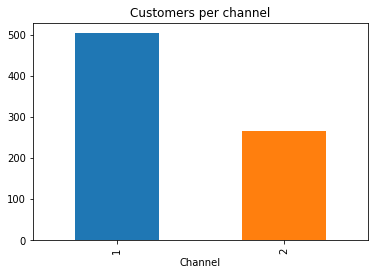

In [69]:
data.Channel.value_counts().plot(kind='bar')
plt.title('Customers per channel')
plt.xlabel('Channel')

In [10]:
len(data.Customer.unique())

474

In [11]:
# Split data by year
data2016 = data.loc[data['Year'] == 2016]
data2017 = data.loc[data['Year'] == 2017]

The aggregated sells across categories through the years 2016 and 2017 show the similar pattern with an increase in sales volume in the year 2017, mainly due to the increase of the number of customers. 

Text(0.5,1,'Sales amount per category')

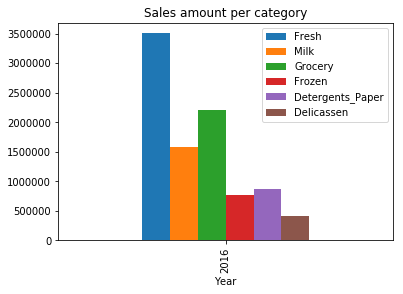

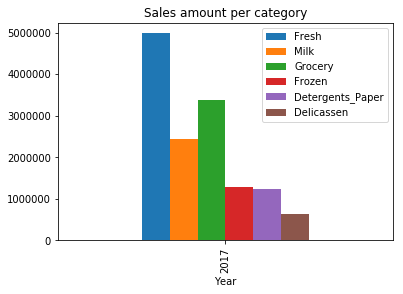

In [70]:
data2016.groupby(['Year']).sum()[['Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].plot(kind='bar')
plt.title('Sales amount per category')
data2017.groupby(['Year']).sum()[['Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].plot(kind='bar')
plt.title('Sales amount per category')

The restaurant/hotel (channel 1) has a high preference on buying products from the 'Fresh' category whereas the retail (channel 2) has a preference for the 'Grocery' items. This pattern holds for both years. 

Text(0.5,1,'Sales amount per category (2017)')

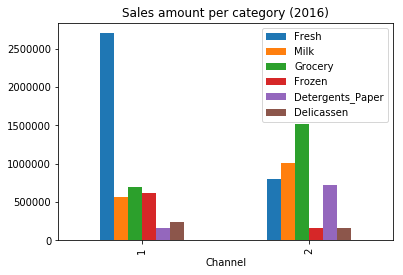

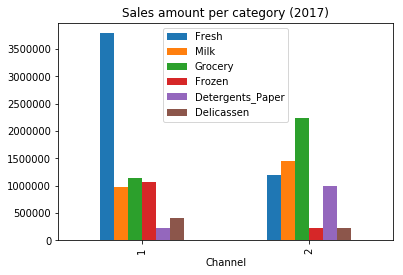

In [71]:
data2016.groupby(['Channel']).sum()[['Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].plot(kind='bar')
plt.title('Sales amount per category (2016)')
data2017.groupby(['Channel']).sum()[['Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].plot(kind='bar')
plt.title('Sales amount per category (2017)')

In [15]:
data2016['Totals'] = data2016['Fresh'] + data2016['Milk'] + data2016['Grocery'] + data2016['Detergents_Paper'] + data2016['Delicassen']
data2016.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Totals
440,2,6048141,2016,10009.0,8690.0,6351.0,158.0,1845.0,776.0,27671.0
442,2,6272942,2016,5019.0,8015.0,6455.0,2189.0,3340.0,7216.0,30045.0
443,1,7856217,2016,12071.0,837.0,3039.0,5123.0,284.0,1037.0,17268.0
444,2,6179511,2016,14700.0,3895.0,4751.0,2466.0,960.0,4459.0,28765.0
445,2,2288780,2016,5930.0,6525.0,3486.0,453.0,1508.0,1045.0,18494.0


The majority of customers from 2016 spent on average less than 40k. This suggests that this is the group from where more revenue is coming. Therefore, the loyalty program should focus on this segment of the customers. 

Text(0,0.5,'Number of customers')

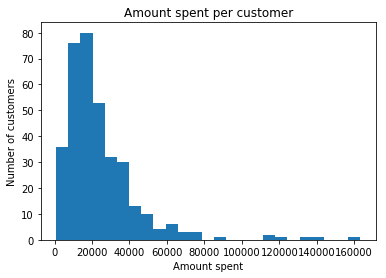

In [72]:
plt.hist(data2016.Totals, bins=25)
plt.title('Amount spent per customer')
plt.xlabel('Amount spent')
plt.ylabel('Number of customers')

In [17]:
# 
data2016_40k = data2016[data2016['Totals'] >= 40000]
print(len(data2016))
print(len(data2016_40k))

353
46


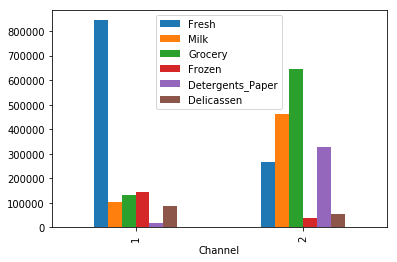

In [18]:
data2016_40k.groupby(['Channel']).sum()[['Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].plot(kind='bar')

Most of the sale volume comes from customers that buy on the lower end of the spectrum. 

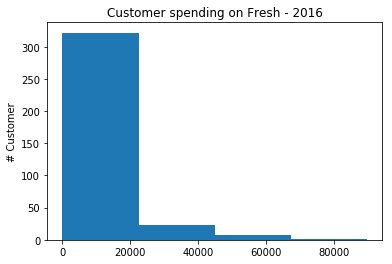

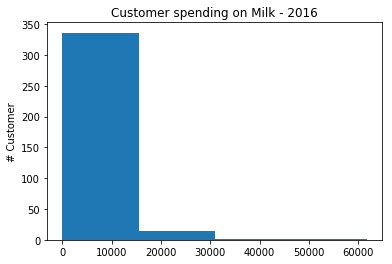

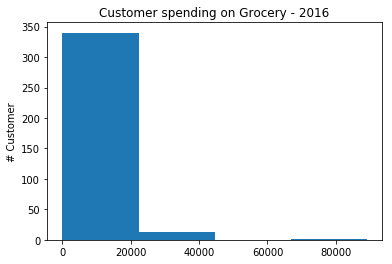

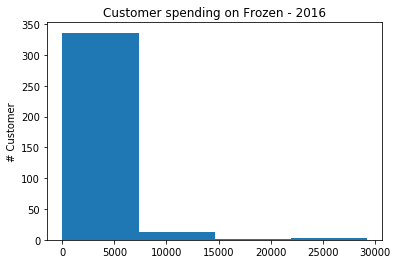

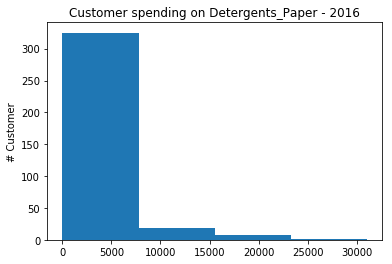

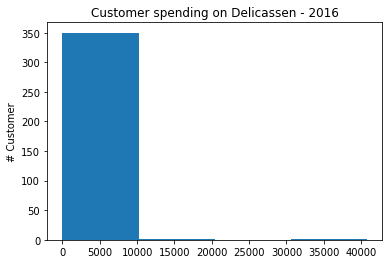

In [19]:
# Distribution
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.hist(data2016[col], bins=4)
    plt.title('Customer spending on {} - 2016'.format(col))
    plt.ylabel('# Customer')
    plt.show()

In [20]:
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
revenue_2016 = pd.DataFrame(columns=columns) 

for col in columns:
    values = []
    values.append(data2016[data[col] <= 20000][col].sum())
    values.append(data2016[(data2016[col] > 20000) & (data2016[col] <= 40000)]['Fresh'].sum())
    values.append(data2016[data2016['Fresh'] > 40000]['Fresh'].sum())
    revenue_2016[col] = values

revenue_2016.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2196661.0,1325194.0,1705750.0,691172.0,753529.0,368733.0
1,730620.0,131386.0,129244.0,59242.0,72734.0,0.0
2,578819.0,578819.0,578819.0,578819.0,578819.0,578819.0


The customers buying less than 20k make the largest selling volume whereas those buying between 20k and 40k represent the smallest segment of the market. The individually highest spending customers represent the second biggest segment in volume. 

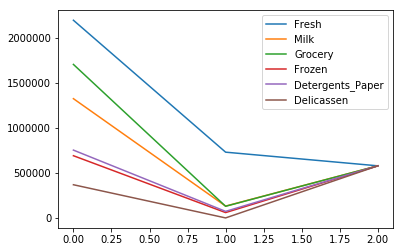

In [21]:
revenue_2016.plot()

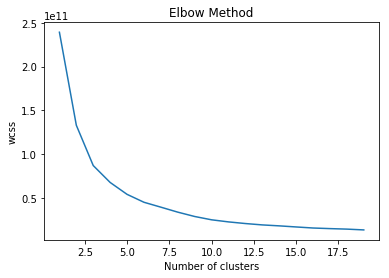

In [22]:
# knn - customer segmentation 
from sklearn.cluster import KMeans

wcss = []
for i in range(1,20):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(data2016[data2016.columns[3:]])
    wcss.append(km.inertia_)
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
km = KMeans(n_clusters=6)
km.fit(data2016[data2016.columns[3:]])
data2016['Clusters'] = km.predict(data2016[data2016.columns[3:]]) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


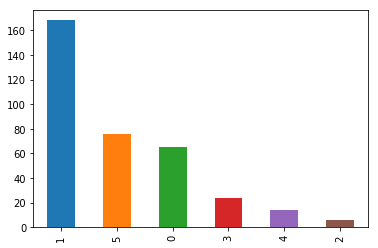

In [24]:
data2016['Clusters'].value_counts().plot(kind='bar')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text xticklabel objects>)

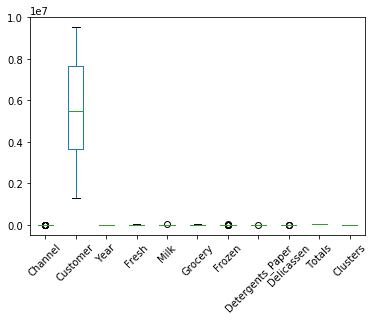

In [25]:
#data2016.drop('Customer', inplace=True, axis=1)
data2016[data2016['Clusters'] == 0].plot(kind='box')
plt.xticks(rotation=45)

Text(0.5,1,'Delicassen')

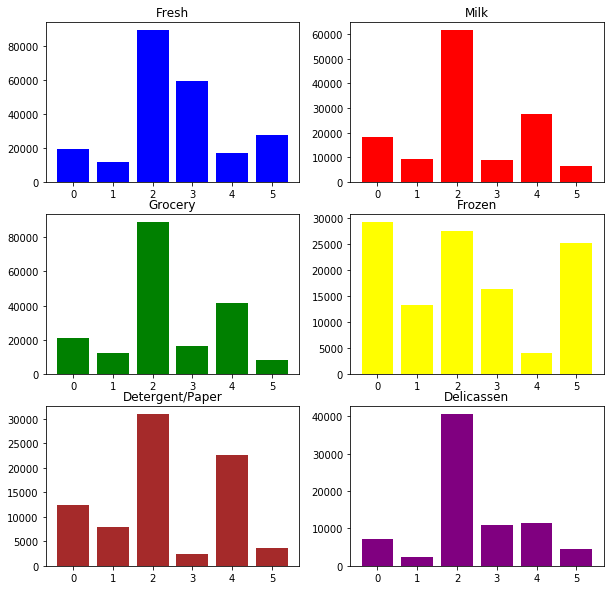

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
plt.bar(data2016['Clusters'], data2016['Fresh'], color='blue', label='Fresh')
plt.title('Fresh')
plt.subplot(3, 2, 2)
plt.bar(data2016['Clusters'], data2016['Milk'], color='red', label='Milk')
plt.title('Milk')
plt.subplot(3, 2, 3)
plt.bar(data2016['Clusters'], data2016['Grocery'], color='green', label='Grocery')
plt.title('Grocery')
plt.subplot(3, 2, 4)
plt.bar(data2016['Clusters'], data2016['Frozen'], color='yellow', label='Grocery')
plt.title('Frozen')
plt.subplot(3, 2, 5)
plt.bar(data2016['Clusters'], data2016['Detergents_Paper'], color='brown', label='Grocery')
plt.title('Detergent/Paper')
plt.subplot(3, 2, 6)
plt.bar(data2016['Clusters'], data2016['Delicassen'], color='purple', label='Grocery')
plt.title('Delicassen')

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

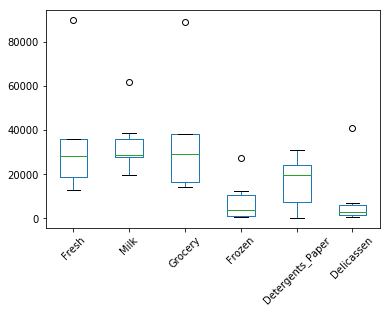

In [62]:
# See what cluster two properties are and probably focus on them since they drive the largest buying from any other group. 
data2016[data2016['Clusters'] == 2][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].plot(kind='box')
plt.xticks(rotation=45)

In [63]:
# Do the same for the 2017 and compare it to 2016; make recommendations

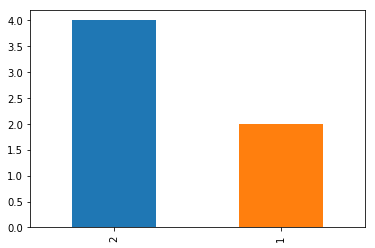

In [66]:
data2016[data2016['Clusters'] ==2]['Channel'].value_counts().plot(kind='bar')

In [87]:
data2016.groupby('Clusters')['Totals'].sum()

Clusters
0    2091583.0
1    1976729.0
2     787776.0
3    1154750.0
4     881130.0
5    1693258.0
Name: Totals, dtype: float64

In [89]:
len(data2016[data2016['Clusters']==0])

65

## Further steps

- Identify profit margin
- Identify what competitors are doing
- Analyze seasonality in in sales